In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../data/global_tax_rates/oecd_inctax_1.xlsx')

In [3]:
df.head(10)

,Unnamed: 0,2024-01-04 00:00:00,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,OECD Countries: 2022 Income Tax Rates,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Top statutory income tax rates [1],NaN,Disposable income as a share of average wages [2],NaN
3,NaN,NaN,Personal income tax,Corporate income tax,Single person with no child,One-earner married couple with two children
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Australia,0.47,0.3,0.770039,0.770039
6,NaN,Austria,0.55,0.25,0.668124,0.756777
7,NaN,Belgium,0.528844,0.25,0.596515,0.711466
8,NaN,Canada,0.535296,0.2621,0.743962,0.776242
9,NaN,Chile,0.4,0.27,0.93,0.93


In [54]:
def clean_data(df):
    df = df.iloc[:, 1:]
    df = df.iloc[3:, :]
    column_names = df.iloc[0]
    column_names.name = 'Index'
    column_names.index.name = 'Index'
    df.columns = column_names
    df = df.iloc[2:].reset_index(drop=True)
    df = df.rename(columns={df.columns[0]: 'Country'})

    return df

In [55]:
df = clean_data(df)
df.head(10)

Index,Country,Personal income tax,Corporate income tax,Single person with no child,One-earner married couple with two children
0,Australia,0.47,0.3,0.770039,0.770039
1,Austria,0.55,0.25,0.668124,0.756777
2,Belgium,0.528844,0.25,0.596515,0.711466
3,Canada,0.535296,0.2621,0.743962,0.776242
4,Chile,0.4,0.27,0.93,0.93
5,Colombia,0.39,0.35,1,1
6,Costa Rica,0.25,0.3,0.895,0.895
7,Czechia,0.23,0.19,0.805231,0.969368
8,Denmark,0.559044,0.22,0.644575,0.681473
9,Estonia,0.2,0.2,0.816115,0.856203


In [ ]:
null_counts = df.isnull().sum()
print(null_counts)


Index
Country                                        2
Personal income tax                            5
Corporate income tax                           5
Single person with no child                    5
One-earner married couple with two children    5
dtype: int64


In [57]:
df = df.dropna()
df.head(10)

Index,Country,Personal income tax,Corporate income tax,Single person with no child,One-earner married couple with two children
0,Australia,0.47,0.3,0.770039,0.770039
1,Austria,0.55,0.25,0.668124,0.756777
2,Belgium,0.528844,0.25,0.596515,0.711466
3,Canada,0.535296,0.2621,0.743962,0.776242
4,Chile,0.4,0.27,0.93,0.93
5,Colombia,0.39,0.35,1,1
6,Costa Rica,0.25,0.3,0.895,0.895
7,Czechia,0.23,0.19,0.805231,0.969368
8,Denmark,0.559044,0.22,0.644575,0.681473
9,Estonia,0.2,0.2,0.816115,0.856203


In [58]:
df.tail(30)

Index,Country,Personal income tax,Corporate income tax,Single person with no child,One-earner married couple with two children
8,Denmark,0.559044,0.22,0.644575,0.681473
9,Estonia,0.2,0.2,0.816115,0.856203
10,Finland,0.5126,0.2,0.688764,0.688764
11,France,0.55368,0.25825,0.723457,0.790318
12,Germany,0.47475,0.299412,0.620245,0.799887
13,Greece,0.44,0.22,0.770158,0.765195
14,Hungary,0.15,0.09,0.665,0.74085
15,Iceland,0.4625,0.2,0.718026,0.777061
16,Ireland,0.48,0.125,0.724932,0.818254
17,Israel,0.5,0.23,0.808774,0.83978


In [59]:
short_listed_countries = ['Australia', 'United Kingdom', 'United States', 'India', 'Canada', 'New Zealand']
filtered_df = df[df['Country'].isin(short_listed_countries)][['Country', 'Personal income tax']]
filtered_df['Personal Income Tax %'] = filtered_df['Personal income tax'] * 100
filtered_df.head(10)

Index,Country,Personal income tax,Personal Income Tax %
0,Australia,0.47,47.0
3,Canada,0.535296,53.5296
26,New Zealand,0.39,39.0
36,United Kingdom,0.45,45.0
37,United States,0.4365,43.65


In [60]:
filtered_df = filtered_df.reset_index(drop=True)

filtered_df.head(10)

Index,Country,Personal income tax,Personal Income Tax %
0,Australia,0.47,47.0
1,Canada,0.535296,53.5296
2,New Zealand,0.39,39.0
3,United Kingdom,0.45,45.0
4,United States,0.4365,43.65


In [61]:
sl_rate = {
    'Country': "Sri Lanka",
    'Personal income tax': 0.36,
    'Personal Income Tax %': 36
}

filtered_df = pd.concat([pd.DataFrame([sl_rate]), filtered_df ], ignore_index=True)
filtered_df.head(10)

,Country,Personal income tax,Personal Income Tax %
0,Sri Lanka,0.36,36
1,Australia,0.47,47.0
2,Canada,0.535296,53.5296
3,New Zealand,0.39,39.0
4,United Kingdom,0.45,45.0
5,United States,0.4365,43.65


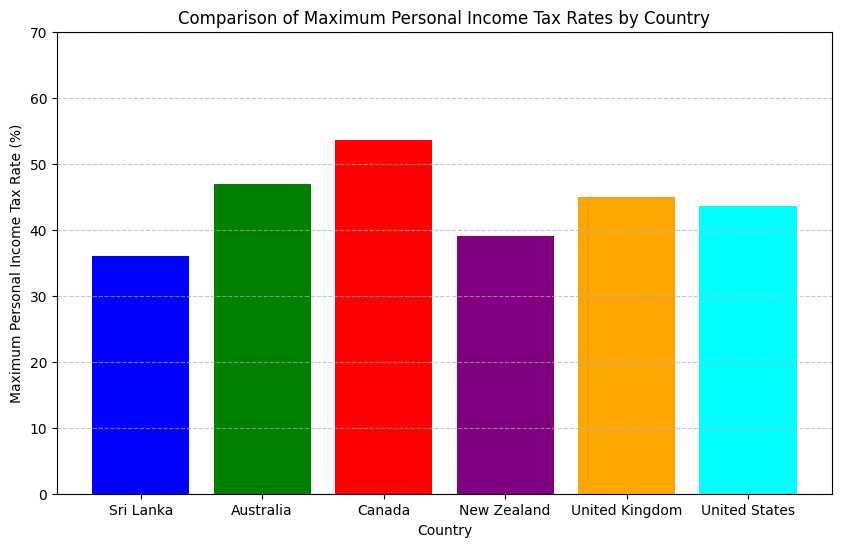

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(filtered_df["Country"], filtered_df["Personal Income Tax %"], color = ['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel("Country")
plt.ylabel("Maximum Personal Income Tax Rate (%)")
plt.title("Comparison of Maximum Personal Income Tax Rates by Country")
plt.ylim(0, 70)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()